In [47]:
import numpy as np
import torch, os, cv2
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/owner/Documents/GitHub/Scalable-Hyperspectral-3D-Imaging/dataset')
sys.path.append('C:/Users/owner/Documents/GitHub/Scalable-Hyperspectral-3D-Imaging')
sys.path.append('C:/Users/owner/Documents/GitHub/Scalable-Hyperspectral-3D-Imaging/dataset')

from utils import constants as C
from data import create_data
from utils import load_data
from image_formation.pixel_renderer import PixelRenderer

1. 100개 포인트에서 랜덤하게 N개 illumination에 대해 rendering한 결과 (pixel 위치, depth도 visualization)

2. 기존 데이터로 렌더링한 이미지에서 100개 랜덤하게 픽셀 샘플링해서 해당하는 위치에서 N개 illumination에 대한 intensity를 100xN으로 visualization

pixel위치 depth 같이 visualization 각각 100x1로

### 100 개 포인트 랜덤하게 N개 illumination에 대해 rendering

In [48]:
pixel_num = 640*640
random = True

img_hyp_text_dir = "C:/Users/owner/Documents/GitHub/Scalable-Hyperspectral-3D-Imaging/dataset/image_formation/img_hyp_text"
img_hyp_file = "img_hyp_text_000.npy"

depth = load_data.load_data().load_depth(0).reshape(C.CAM_RES*C.CAM_RES)
hyp = np.load(os.path.join(img_hyp_text_dir, img_hyp_file)).reshape(C.CAM_RES*C.CAM_RES, 77)
hyp = torch.tensor(hyp, dtype = torch.float32)

# depth = create_data.createData("depth", pixel_num).create()
# hyp = create_data.createData('hyp', pixel_num).create()
cam_coord = create_data.createData('coord', pixel_num, random = False).create()

In [50]:
cam_coord.shape

torch.Size([409600, 3])

In [51]:
cam_N_img, xy_proj, cam_coord, xyz_gt = PixelRenderer(depth = depth, hyp = hyp, cam_coord= cam_coord, pixel_num = pixel_num).patt_form()
# cam_N_img제외 다 normalized 된 형태

C:/Users/owner/Documents/GitHub/Scalable-Hyperspectral-3D-Imaging/dataset\image_formation\pixel_renderer.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.hyp = torch.tensor(hyp, device= self.device)
C:/Users/owner/Documents/GitHub/Scalable-Hyperspectral-3D-Imaging/dataset\image_formation\pixel_renderer.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  illum = torch.tensor(self.load_data.load_illum(i)) # 0 번째 illumination pattern


In [52]:
cam_N_img = cam_N_img.detach().cpu().numpy()

In [53]:
cam_N_img.shape

(409600, 42, 3)

In [54]:
cam_N_img = cam_N_img.reshape(640,640,42,3)
xy_proj = xy_proj.reshape(640,640,2)
cam_coord = cam_coord.reshape(640,640,2)
xyz_gt = xyz_gt.reshape(640,640,3)

### depth / 3D point

In [8]:
# depth_vis = np.zeros(shape=(100,100,3))
# for i in range(pixel_num):
#     depth_vis[:,i,0] = xyz_gt[:,0]
#     depth_vis[:,i,1] = xyz_gt[:,1]
#     depth_vis[:,i,2] = xyz_gt[:,2]
#     # depth_vis[:,i] = depth

# depth_vis = depth.unsqueeze(dim = 1)

# depth_vis = xyz_gt

In [55]:
# plt.figure(figsize=(10,5))
# plt.subplot(131), plt.imshow(depth_vis[...,0]), plt.colorbar(), plt.title('3D x-coord', fontsize = 10)
# plt.subplot(132), plt.imshow(depth_vis[...,1]), plt.colorbar(), plt.title('3D y-coord', fontsize = 10)
# plt.subplot(133), plt.imshow(depth_vis[...,2]), plt.colorbar(), plt.title('3D z-coord(depth)', fontsize = 10)

### XY Proj plane

In [56]:
# xy_proj_vis = np.zeros(shape=(100,100, 2))
# for i in range(pixel_num):
#     xy_proj_vis[:,i,0] = xy_proj[:,0]
#     xy_proj_vis[:,i,1] = xy_proj[:,1]
#     # depth_vis[:,i] = depth

# depth_vis = depth.unsqueeze(dim = 1)
xy_proj_vis = xy_proj

(<AxesSubplot:title={'center':'proj 100 pixel y-coord'}>,
 Text(0.5, 1.0, 'proj 100 pixel y-coord'))

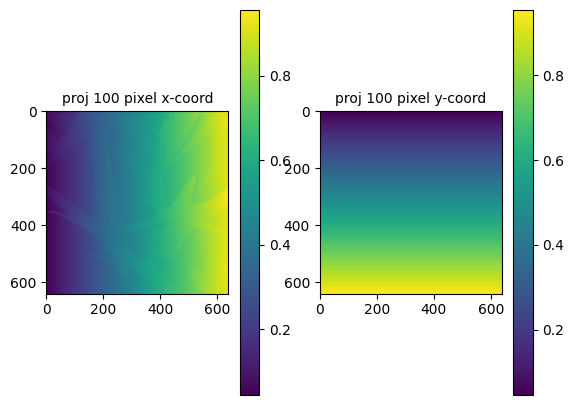

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(xy_proj_vis[...,0]), plt.colorbar(), plt.title('proj 100 pixel x-coord', fontsize = 10)
plt.subplot(132), plt.imshow(xy_proj_vis[...,1]), plt.colorbar(), plt.title('proj 100 pixel y-coord', fontsize = 10)

#### N pattern RGB values

In [58]:
cam_N_img = torch.tensor(cam_N_img)
min = cam_N_img[:,:,1,1].min(axis=1).values
max = cam_N_img[:,:,1,1].max(axis=1).values
# plt.subplot(231), plt.imshow(cam_N_img[:,:,0]), plt.colorbar(), plt.title('R 100 pixel N illums, R channel', fontsize  =40)
normalized1 = (cam_N_img[:,:,1,1]-min[:,None])/(max[:,None]-min[:,None])

(<AxesSubplot:title={'center':'100 pixel N illums, R channel'}>,
 Text(0.5, 1.0, '100 pixel N illums, R channel'))

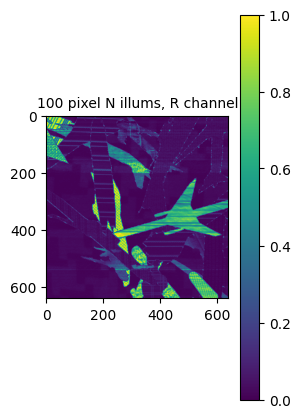

In [59]:
plt.figure(figsize=(10,5))

plt.subplot(131), plt.imshow(normalized1), plt.colorbar(), plt.title('100 pixel N illums, R channel', fontsize = 10)
# plt.subplot(132), plt.imshow(cam_N_img[:,:,1,1]), plt.colorbar(), plt.title('100 pixel N illums, G channel', fontsize  =40)
# plt.subplot(133), plt.imshow(cam_N_img[:,:,1,2]), plt.colorbar(), plt.title('100 pixel N illums, B channel', fontsize  =40)

# plt.figure(figsize=(40,25))
# plt.subplot(131), plt.imshow(cam_N_img[:,:,0]), plt.colorbar(), plt.title('100 pixel N illums, R channel', fontsize  =40)
# plt.subplot(132), plt.imshow(cam_N_img[:,:,1]), plt.colorbar(), plt.title('100 pixel N illums, G channel', fontsize  =40)
# plt.subplot(133), plt.imshow(cam_N_img[:,:,2]), plt.colorbar(), plt.title('100 pixel N illums, B channel', fontsize  =40)

#### Camera coordinate x,y,z

In [16]:
# cam_coord_vis = torch.zeros(size=(100,100, 2))

# for k in range(1):
#     for i in range(pixel_num):
#         cam_coord_vis[:,i,0] = cam_coord[:,0]
#         cam_coord_vis[:,i,1] = cam_coord[:,1]

In [16]:
# cam_coord_vis = cam_coord

In [60]:
# plt.figure(figsize=(10,5))
# plt.subplot(131), plt.imshow(cam_coord_vis[...,0]), plt.colorbar(), plt.title('100 pixel x-coord', fontsize = 10)
# plt.subplot(132), plt.imshow(cam_coord_vis[...,1]), plt.colorbar(), plt.title('100 pixel y-coord', fontsize = 10)
# # plt.subplot(133), plt.imshow(cam_coord_vis[...,2]), plt.colorbar(), plt.title('100 pixel z-coord', fontsize = 30)

### 기존 데이터로 렌더링, 랜덤한 100개 픽셀

In [61]:
depth = load_data.load_data().load_depth(0).reshape(C.CAM_RES*C.CAM_RES)
# cam_coord = create_data.createData('coord', C.CAM_RES*C.CAM_RES, random=False).create()
from model import dataTools as dtools
cam_coord = dtools.HypDepthData().cam_coord()

In [19]:
cam_coord = cam_coord[0]

In [62]:
from utils import normalize

# xy proj data 가져오기
gt_dir = C.IMGFORM_RESULT
xy_proj_data = torch.zeros(1, C.CAM_RES*C.CAM_RES, 2)
files = sorted(os.listdir((gt_dir))) # image formation result (no gratings)
cnt = 0

# for i in range(self.N_eval):
for idx, file in enumerate(files): 
    if file.endswith(".npy"): # 2 번
        xy = np.load(os.path.join(gt_dir, file))
        xy = torch.tensor(xy[1,0,...]).permute(1,0)
        xy = normalize.normalization(xy, train = False, xyz = False)
        xy_proj_data[cnt,...] = xy # 모든 scene의, 전체 pixel의 projector plane coord ground truth
        
        cnt +=1 
        if cnt == 1:
            break

In [63]:
new_render_existing_data = "C:/Users/owner/Documents/GitHub/Scalable-Hyperspectral-3D-Imaging/result"
files = sorted(os.listdir(new_render_existing_data))
files.remove('xy_vproj_scene_000.npy')

In [64]:
scene_num = 1
N3Arr = torch.zeros(size=(scene_num, C.CAM_RES*C.CAM_RES, C.N_ILLUM, 3)) # 1000 pixels , N_pattern, RGB 3 channel

for i in range(1):
    for idx, file in enumerate(files[i*C.N_ILLUM : i*C.N_ILLUM+ C.N_ILLUM]):
        image = cv2.imread(os.path.join(new_render_existing_data, file), -1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image/255.
        image = torch.tensor(image.reshape(C.CAM_RES*C.CAM_RES, 3))
        
        N3Arr[i,:, idx, :] = image # 모든 pixel의 N_illum x 3 array / total # of scene, 640*640, N, 3


In [65]:
N3Arr = N3Arr[0]
N3Arr.shape

torch.Size([409600, 42, 3])

In [22]:
# random_idx = np.random.randint(low=0, high = 640*640, size=(100))

In [23]:
# random_N3Arr = N3Arr[random_idx]
# random_depth = depth[random_idx]
# random_cam_coord = cam_coord[random_idx]
# random_xy_proj = xy_proj_data[0][random_idx]

In [66]:
N3Arr = N3Arr.reshape(640,640,42,3)
depth = depth.reshape(640,640)
cam_coord = cam_coord.reshape(640,640,2)
xy_proj_data = xy_proj_data.reshape(640,640,2)


In [67]:
# cam_coord_vis = np.zeros(shape=(100,100, 2))
# for i in range(pixel_num):
#     cam_coord_vis[:,i,0] = random_cam_coord[:,0]
#     cam_coord_vis[:,i,1] = random_cam_coord[:,1]
#     # depth_vis[:,i] = depth

# # depth_vis = depth.unsqueeze(dim = 1)
xy_proj_vis = xy_proj

(<AxesSubplot:title={'center':'cam 100 pixel y-coord'}>,
 Text(0.5, 1.0, 'cam 100 pixel y-coord'))

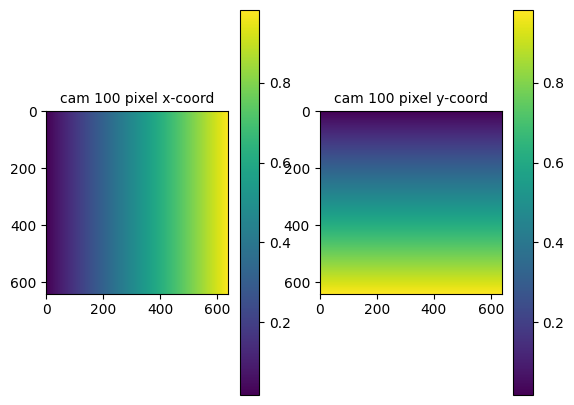

In [68]:
# plt.figure(figsize=(30,15))
# plt.subplot(131), plt.imshow(cam_coord[...,0]), plt.colorbar(), plt.title('cam 100 pixel x-coord', fontsize = 30)
# plt.subplot(132), plt.imshow(cam_coord[...,1]), plt.colorbar(), plt.title('cam 100 pixel y-coord', fontsize = 30)

plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(cam_coord[...,0]), plt.colorbar(), plt.title('cam 100 pixel x-coord', fontsize = 10)
plt.subplot(132), plt.imshow(cam_coord[...,1]), plt.colorbar(), plt.title('cam 100 pixel y-coord', fontsize = 10)

#### Projector plane 100 random 점

In [27]:
# xy_proj_vis_2 = np.zeros(shape=(100,100, 2))
# for i in range(pixel_num):
#     xy_proj_vis_2[:,i,0] = random_xy_proj[:,0]
#     xy_proj_vis_2[:,i,1] = random_xy_proj[:,1]
#     # depth_vis[:,i] = depth

# depth_vis = depth.unsqueeze(dim = 1)

In [69]:
xy_proj_vis_2 = xy_proj_data

(<AxesSubplot:title={'center':'proj 100 pixel y-coord'}>,
 Text(0.5, 1.0, 'proj 100 pixel y-coord'))

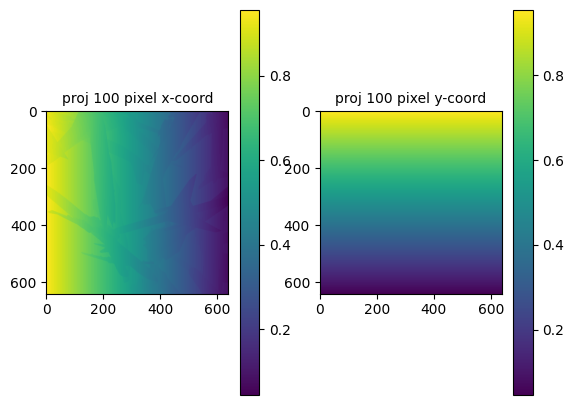

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(xy_proj_vis_2[...,0]), plt.colorbar(), plt.title('proj 100 pixel x-coord', fontsize = 10)
plt.subplot(132), plt.imshow(xy_proj_vis_2[...,1]), plt.colorbar(), plt.title('proj 100 pixel y-coord', fontsize = 10)

#### Depth / 3d point

In [30]:
# xyz 3d 점 가져오기
xyz_gt_dir = C.XYZ_GT

xyz_gt = torch.zeros(size=(1, C.CAM_RES*C.CAM_RES, 3))

files = sorted(os.listdir((xyz_gt_dir))) # xyz 3d points
cnt = 0

# for i in range(self.N_eval):
for idx, file in enumerate(files):
    xyz = torch.load(os.path.join(xyz_gt_dir, file))
    xyz_z_tmp = -xyz[...,2]
    xyz[...,2] = xyz_z_tmp
    xyz_gt[cnt,:,:] = xyz # 모든 scene의, 전체 pixel의 N_illum x 3 array
    cnt +=1 
    if cnt == 1:
        break

In [31]:
# random_xyz_gt = xyz_gt[0][random_idx]
xyz_gt = xyz_gt[0].reshape(640,640,3)

In [32]:
xyz_gt.shape

torch.Size([640, 640, 3])

In [48]:
# random_xyz_gt.shape

In [42]:
# depth_vis_3 = np.zeros(shape=(100,100,3))
# for i in range(pixel_num):
#     depth_vis_3[:,i,0] = random_xyz_gt[:,0]
#     depth_vis_3[:,i,1] = random_xyz_gt[:,1]
#     depth_vis_3[:,i,2] = random_xyz_gt[:,2]
#     # depth_vis[:,i] = depth

# # depth_vis = depth.unsqueeze(dim = 1)

In [44]:
# random_xyz_gt.shape

torch.Size([100, 3])

In [71]:
# depth_vis_3 = normalize.normalization(torch.tensor(xyz_gt), train = True, xyz = True)   

In [72]:
# depth_vis_3.shape

In [73]:
# plt.figure(figsize=(10,5))
# plt.subplot(131), plt.imshow(depth_vis_3[...,0]), plt.colorbar(), plt.title('3D x-coord', fontsize = 10)
# plt.subplot(132), plt.imshow(depth_vis_3[...,1]), plt.colorbar(), plt.title('3D y-coord', fontsize = 10)
# plt.subplot(133), plt.imshow(depth_vis_3[...,2]), plt.colorbar(), plt.title('3D z-coord(depth)', fontsize = 10)

In [36]:
# depth_vis_2 = np.zeros(shape=(100,100))
# for i in range(pixel_num):
#     depth_vis_2[:,i] = random_depth

# # depth_vis = depth.unsqueeze(dim = 1)

In [37]:
# depth_vis_2= depth

In [38]:
# plt.imshow(depth_vis_2), plt.colorbar(), plt.title('depth')

#### 100 pixel N pattern

In [74]:
# random_N3Arr = N3Arr[random_idx]
random_N3Arr = N3Arr

In [75]:
min = random_N3Arr[:,:,1,1].min(axis=1).values
max = random_N3Arr[:,:,1,1].max(axis=1).values
# plt.subplot(231), plt.imshow(cam_N_img[:,:,0]), plt.colorbar(), plt.title('R 100 pixel N illums, R channel', fontsize  =40)
normalized2 = (random_N3Arr[:,:,1,1]-min[:,None])/(max[:,None]-min[:,None])

In [76]:
normalized2.shape

torch.Size([640, 640])

(<AxesSubplot:title={'center':'100 pixel N illums, R channel'}>,
 Text(0.5, 1.0, '100 pixel N illums, R channel'))

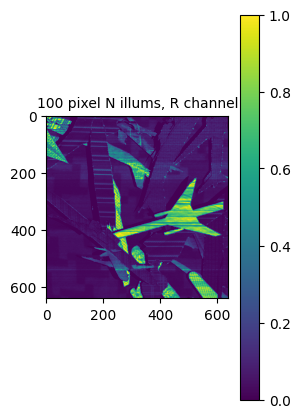

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(131), plt.imshow(normalized2), plt.colorbar(), plt.title('100 pixel N illums, R channel', fontsize  =10)
# plt.subplot(132), plt.imshow(random_N3Arr[:,:,1,1]), plt.colorbar(), plt.title('100 pixel N illums, G channel', fontsize  =40)
# plt.subplot(133), plt.imshow(random_N3Arr[:,:,1,2]), plt.colorbar(), plt.title('100 pixel N illums, B channel', fontsize  =40)
# plt.subplot(131), plt.imshow(random_N3Arr[:,:,0]), plt.colorbar(), plt.title('100 pixel N illums, R channel', fontsize  =40)
# plt.subplot(132), plt.imshow(random_N3Arr[:,:,1]), plt.colorbar(), plt.title('100 pixel N illums, G channel', fontsize  =40)
# plt.subplot(133), plt.imshow(random_N3Arr[:,:,2]), plt.colorbar(), plt.title('100 pixel N illums, B channel', fontsize  =40)

In [43]:
# cam_coord_vis_2 = torch.zeros(size=(100,100, 3))

# for k in range(3):
#     for i in range(pixel_num):
#         cam_coord_vis_2[:,i,k] = random_cam_coord[:,k]

In [44]:
# plt.figure(figsize=(30,15))
# plt.subplot(131), plt.imshow(cam_coord_vis_2[...,0]), plt.colorbar(), plt.title('100 pixel x-coord', fontsize = 30)
# plt.subplot(132), plt.imshow(cam_coord_vis_2[...,1]), plt.colorbar(), plt.title('100 pixel y-coord', fontsize = 30)
# plt.subplot(133), plt.imshow(cam_coord_vis_2[...,2]), plt.colorbar(), plt.title('100 pixel z-coord', fontsize = 30)

### Comparison

#### Depth

In [45]:
# plt.figure(figsize=(15,10))
# plt.subplot(121),plt.imshow(depth_vis[:,:,2]), plt.colorbar(), plt.title('depth random')
# plt.subplot(122),plt.imshow(depth_vis_2), plt.colorbar(), plt.title('depth')

#### Cam cooridnate

In [ ]:
# plt.figure(figsize=(40,10))
# plt.subplot(141), plt.imshow(cam_coord_vis[...,0]), plt.colorbar(), plt.title('Random 100 pixel x-coord', fontsize = 25)
# plt.subplot(142), plt.imshow(cam_coord_vis[...,1]), plt.colorbar(), plt.title('Random 100 pixel y-coord', fontsize = 25)

# plt.subplot(143), plt.imshow(cam_coord_vis_2[...,0]), plt.colorbar(), plt.title('100 pixel x-coord', fontsize = 25)
# plt.subplot(144), plt.imshow(cam_coord_vis_2[...,1]), plt.colorbar(), plt.title('100 pixel y-coord', fontsize = 25)


#### N pattern for 100 pixels

In [ ]:
cam_N_img = torch.tensor(cam_N_img)

In [ ]:
random_N3Arr.shape

torch.Size([640, 640, 42, 3])

c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(<AxesSubplot:title={'center':'100 pixel N illums, G channel'}>,
 Text(0.5, 1.0, '100 pixel N illums, G channel'))

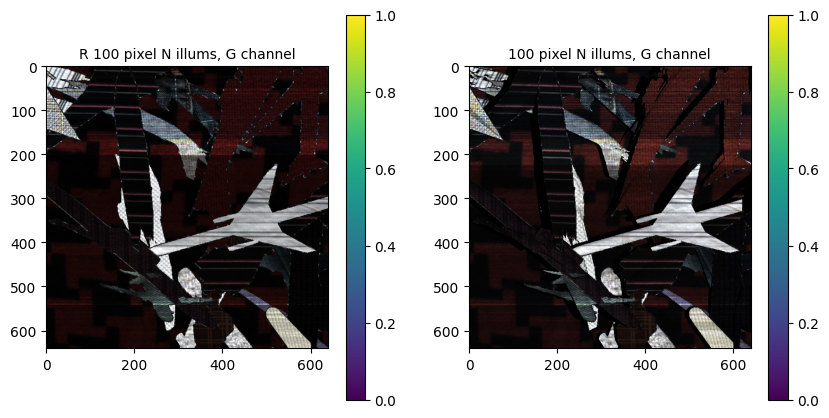

In [46]:
plt.figure(figsize=(10,5))
cam_N_img = torch.tensor(cam_N_img)
min = cam_N_img[:,:,1].min(axis=1).values
max = cam_N_img[:,:,1].max(axis=1).values
# plt.subplot(231), plt.imshow(cam_N_img[:,:,0]), plt.colorbar(), plt.title('R 100 pixel N illums, R channel', fontsize  =40)
normalized1 = (cam_N_img[:,:,1]-min[:,None])/(max[:,None]-min[:,None])
# plt.subplot(121), plt.imshow(cam_N_img[:,:,1]), plt.colorbar(), plt.title('R 100 pixel N illums, G channel', fontsize  =40)

plt.subplot(121), plt.imshow(normalized1), plt.colorbar(), plt.title('R 100 pixel N illums, G channel', fontsize  =10)
# plt.subplot(233), plt.imshow(cam_N_img[:,:,2]), plt.colorbar(), plt.title('R 100 pixel N illums, B channel', fontsize  =40)

# plt.figure(figsize=(40,50))
# plt.subplot(234), plt.imshow(random_N3Arr[:,:,0]), plt.colorbar(), plt.title('100 pixel N illums, R channel', fontsize  =40)
min = random_N3Arr[:,:,1].min(axis=1).values
max = random_N3Arr[:,:,1].max(axis=1).values
normalized2 = (random_N3Arr[:,:,1]-min[:,None])/(max[:,None]-min[:,None])
plt.subplot(122), plt.imshow(normalized2), plt.colorbar(), plt.title('100 pixel N illums, G channel', fontsize  =10)
# plt.subplot(236), plt.imshow(random_N3Arr[:,:,2]), plt.colorbar(), plt.title('100 pixel N illums, B channel', fontsize  =40)

In [ ]:
normalized1.mean(), normalized1.min(), normalized1.max()

(tensor(0.1201), tensor(0.), tensor(1.))

In [ ]:
normalized2[torch.isnan(normalized2)] = 0.

In [ ]:
normalized2.mean()

tensor(0.1301)

In [ ]:
normalized2.max(), normalized2.min()

(tensor(1.), tensor(0.))

(<AxesSubplot:title={'center':'100 pixel N illums, G channel'}>,
 Text(0.5, 1.0, '100 pixel N illums, G channel'))

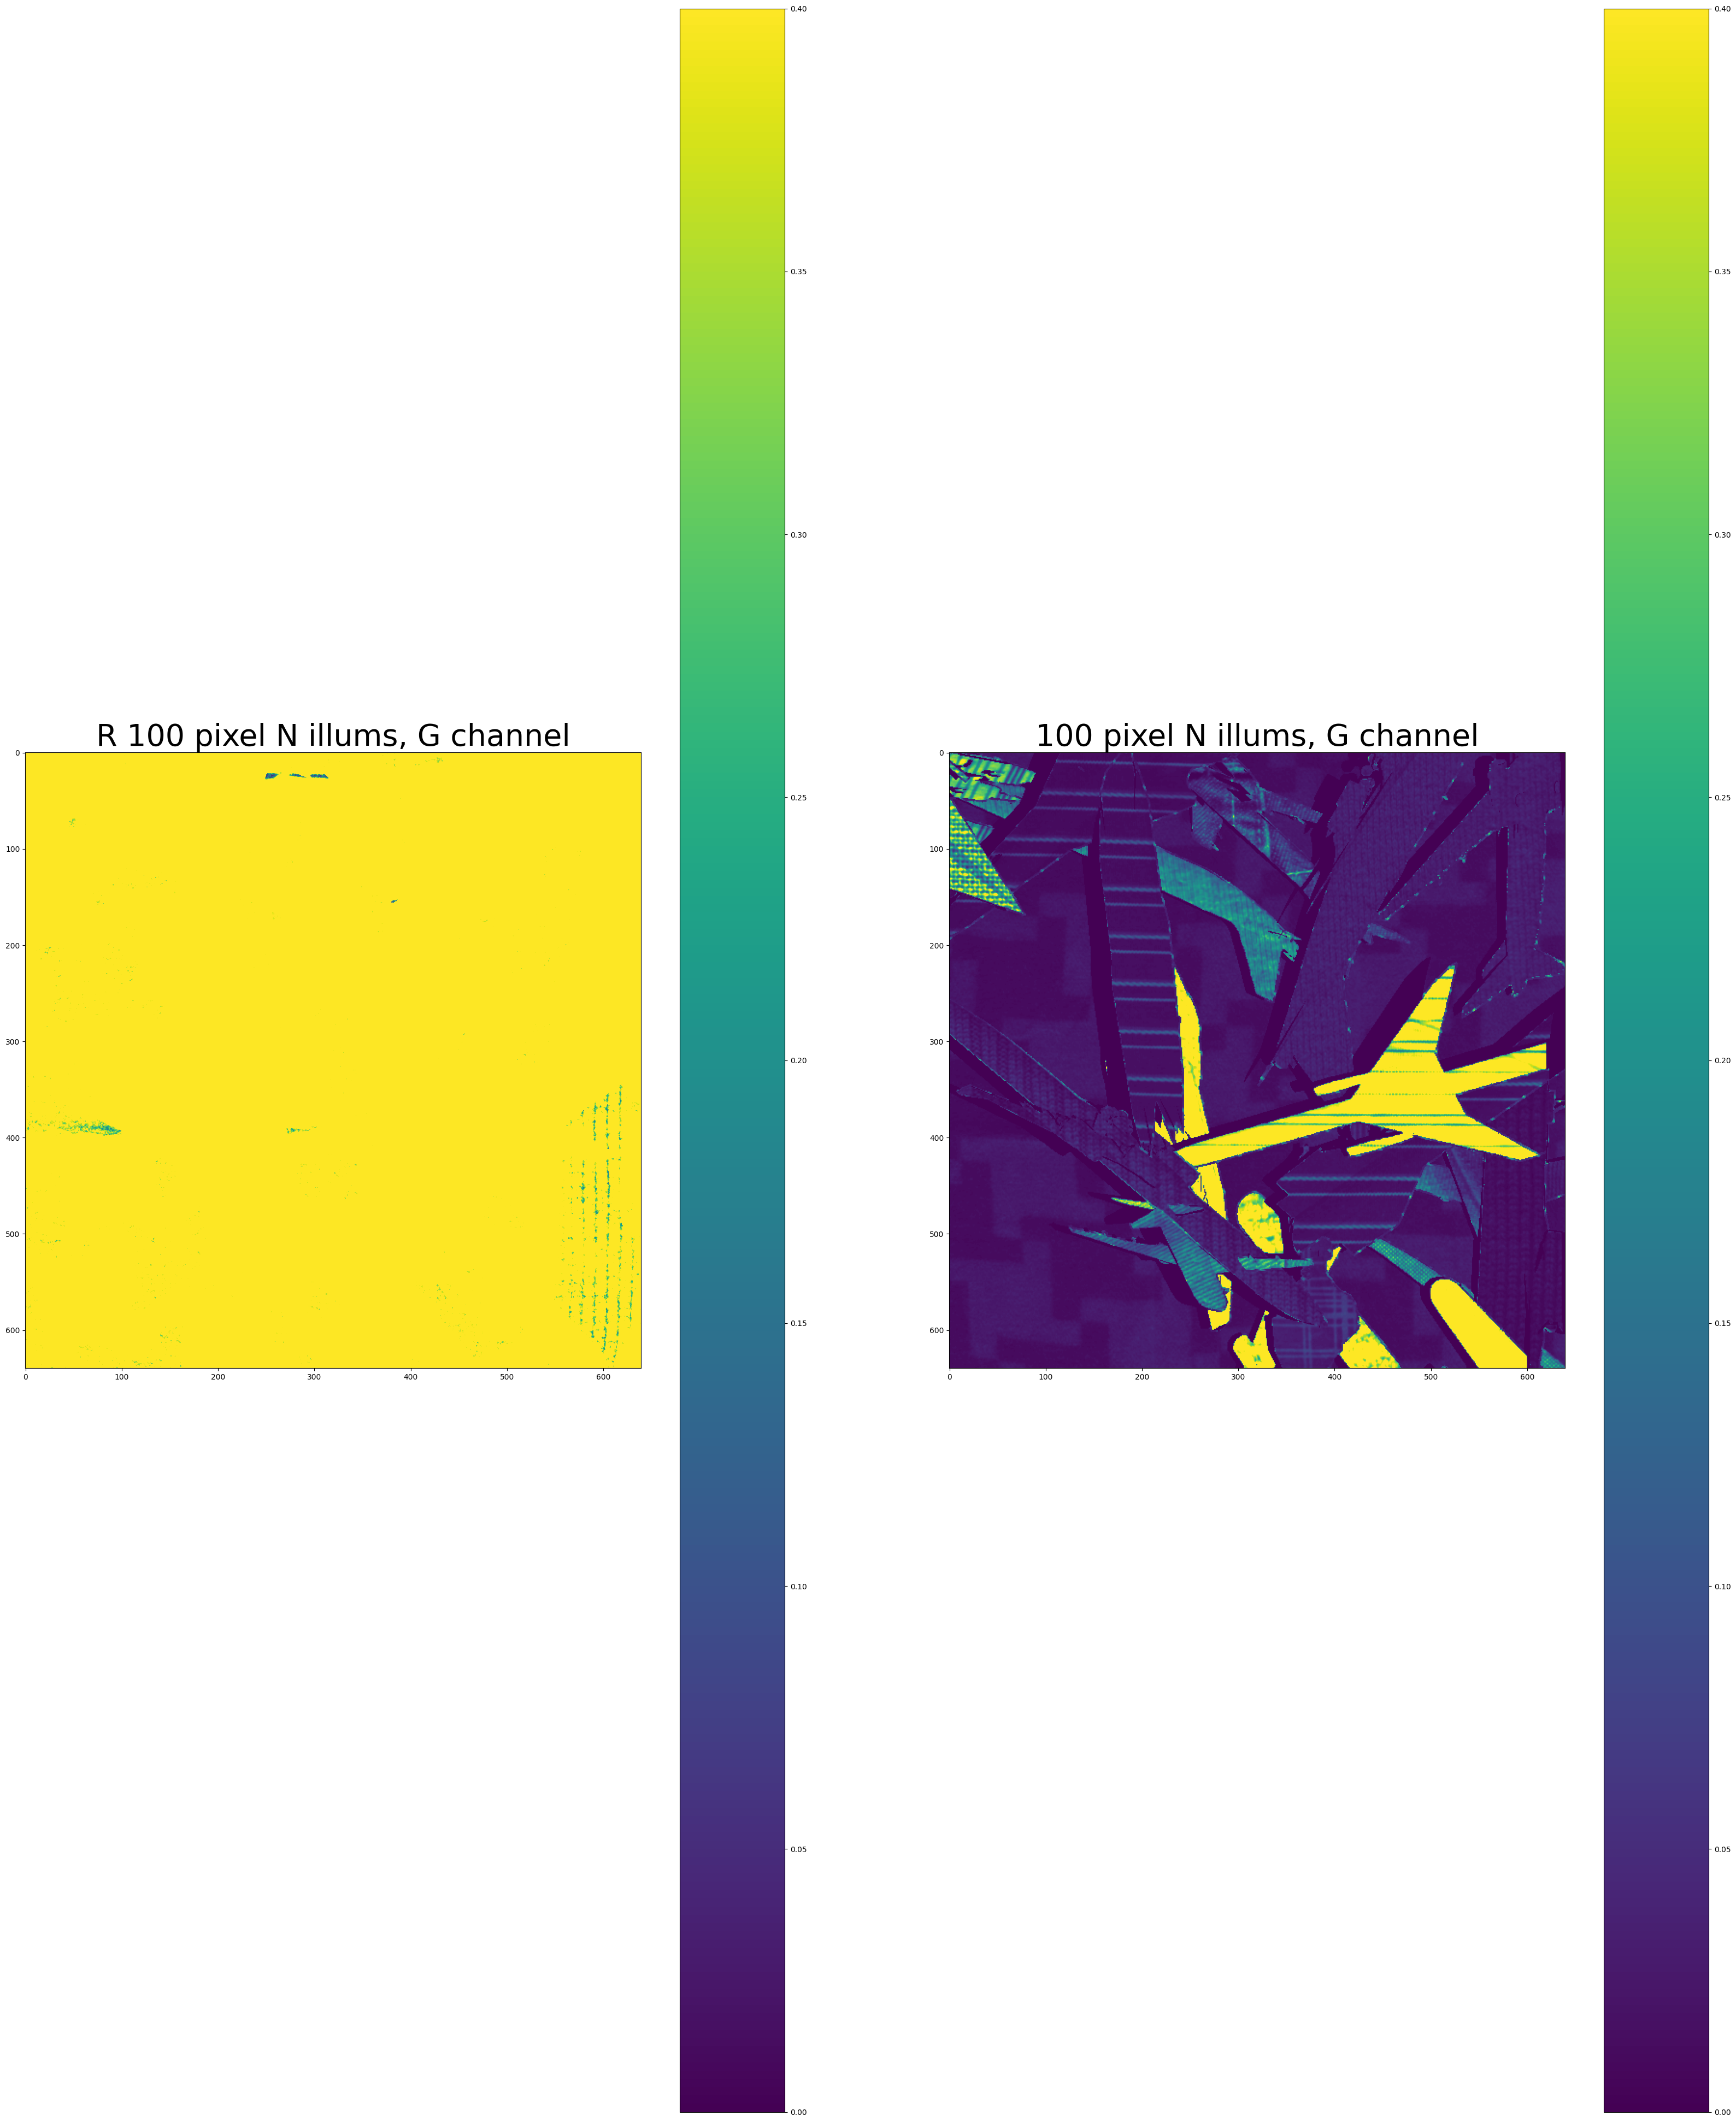

In [ ]:
plt.figure(figsize=(40,50))
# plt.subplot(231), plt.imshow(cam_N_img[:,:,0]), plt.colorbar(), plt.title('R 100 pixel N illums, R channel', fontsize  =40)
plt.subplot(121), plt.imshow(cam_N_img[:,:,1,1], vmax = 0.4, vmin = 0), plt.colorbar(), plt.title('R 100 pixel N illums, G channel', fontsize  =40)
# plt.subplot(233), plt.imshow(cam_N_img[:,:,2]), plt.colorbar(), plt.title('R 100 pixel N illums, B channel', fontsize  =40)

# plt.figure(figsize=(40,50))
# plt.subplot(234), plt.imshow(random_N3Arr[:,:,0]), plt.colorbar(), plt.title('100 pixel N illums, R channel', fontsize  =40)
plt.subplot(122), plt.imshow(random_N3Arr[:,:,1,1], vmax = 0.4, vmin = 0), plt.colorbar(), plt.title('100 pixel N illums, G channel', fontsize  =40)
# plt.subplot(236), plt.imshow(random_N3Arr[:,:,2]), plt.colorbar(), plt.title('100 pixel N illums, B channel', fontsize  =40)